# HEART ATTACK SURVIVED ONES IN ADULTS AND YOUTH IN NIGERIA

## Introduction

This dataset encompasses various socio-demographic, lifestyle, and medical attributes of individuals from different regions of Nigeria. Each row in the dataset represents an individual and includes the following attributes: state, age group, gender, BMI, smoking status, alcohol consumption, exercise frequency, hypertension, diabetes, cholesterol level, family history, stress level, diet type, heart attack severity, hospitalization status, survival status, income level, urban/rural classification, and employment status.

The primary goal of this project is to predict the survival status of individuals using machine learning models. This prediction can aid in understanding the factors that influence survival rates and potentially guide healthcare interventions.

The project involves the following steps:
1. Data Loading and Exploration
2. Data Visualization
3. Data Cleaning and Preprocessing
4. Model Training and Evaluation
6. Hyperparameter Tuning
7. Model Selection

The predictive models developed using this dataset can provide insights into the interplay of various factors and their impact on survival, thereby contributing to better healthcare strategies and personalized medical interventions

# IMPORT STATEMENTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


# DATA LOADING

In [2]:
df = pd.read_csv("C:\\Users\\govin\\OneDrive\\Desktop\\project heart attack\\heart_attack_youth_vs_adult_nigeria.csv")
df.head()

,State,Age_Group,Gender,BMI,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Hypertension,Diabetes,Cholesterol_Level,Family_History,Stress_Level,Diet_Type,Heart_Attack_Severity,Hospitalized,Survived,Income_Level,Urban_Rural,Employment_Status
0,Ondo,Youth,Female,34.5,Non-Smoker,High,Occasionally,No,Yes,Borderline,Yes,Low,Unhealthy,Mild,No,Yes,Medium,Urban,Employed
1,FCT,Youth,Male,15.2,Non-Smoker,High,Occasionally,No,Yes,High,No,Moderate,Unhealthy,Mild,Yes,No,High,Rural,Employed
2,Borno,Youth,Female,25.0,Non-Smoker,High,Weekly,No,Yes,High,No,Moderate,Mixed,Moderate,Yes,No,Medium,Rural,Student
3,Katsina,Youth,Male,19.7,Non-Smoker,High,Occasionally,No,No,High,Yes,High,Healthy,Mild,Yes,No,Low,Rural,Unemployed
4,Kaduna,Adult,Female,35.6,Non-Smoker,Low,Rarely,No,Yes,High,Yes,High,Healthy,Moderate,No,Yes,Low,Rural,Student


# DATA EXPLORATION

In [35]:
df.shape

(898796, 19)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898796 entries, 0 to 898795
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   State                  898796 non-null  object 
 1   Age_Group              898796 non-null  object 
 2   Gender                 898796 non-null  object 
 3   BMI                    898796 non-null  float64
 4   Smoking_Status         898796 non-null  object 
 5   Alcohol_Consumption    673208 non-null  object 
 6   Exercise_Frequency     898796 non-null  object 
 7   Hypertension           898796 non-null  object 
 8   Diabetes               898796 non-null  object 
 9   Cholesterol_Level      898796 non-null  object 
 10  Family_History         898796 non-null  object 
 11  Stress_Level           898796 non-null  object 
 12  Diet_Type              898796 non-null  object 
 13  Heart_Attack_Severity  898796 non-null  object 
 14  Hospitalized           898796 non-nu

In [37]:
df.describe()

,BMI
count,898796.000000
mean,27.502941
std,7.220324
min,15.000000
25%,21.200000
50%,27.500000
75%,33.800000
max,40.000000


# VISUALIZATION

# Number of individuals by Gender

Gender
Female    449693
Male      449103
Name: count, dtype: int64


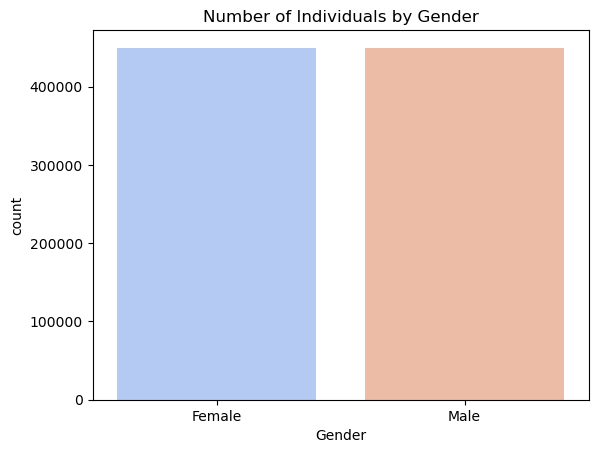

In [38]:
print(df['Gender'].value_counts())
sns.countplot(data=df, x='Gender', palette="coolwarm")
plt.title('Number of Individuals by Gender')
plt.show()

# Proportion of Survived vs Not Survived


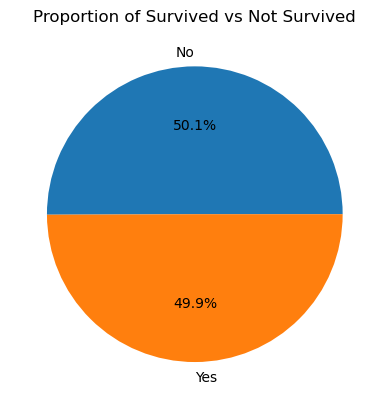

In [39]:
survived_counts = df['Survived'].value_counts()
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Survived vs Not Survived')
plt.show()

# Distribution of BMI

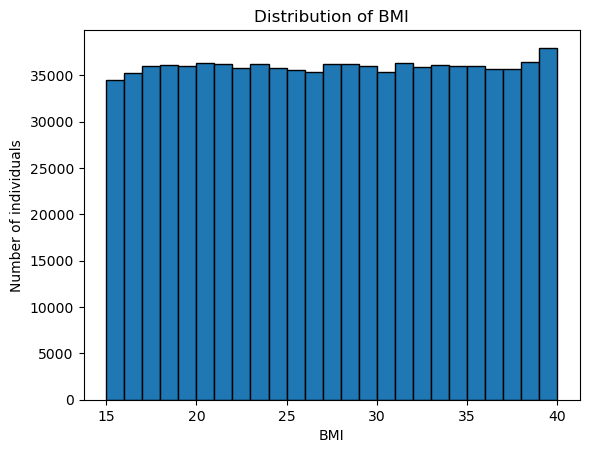

In [40]:

plt.hist(df['BMI'], bins=25, edgecolor='k')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Number of individuals')
plt.show()

# Exercise frequency by Alcohol Consumption

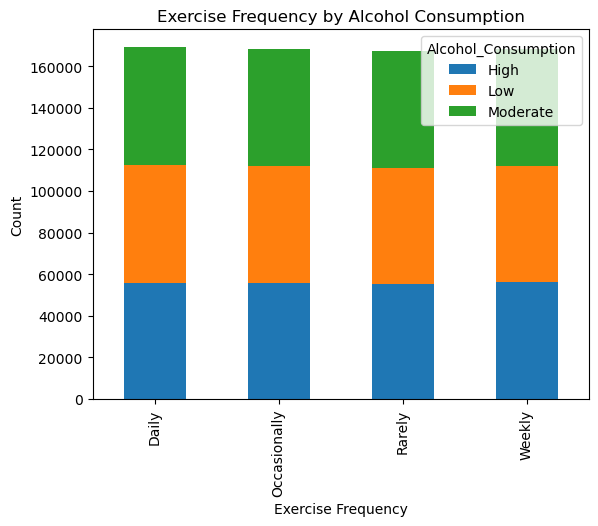

In [10]:

cross_tab = pd.crosstab(df['Exercise_Frequency'], df['Alcohol_Consumption'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Exercise Frequency by Alcohol Consumption')
plt.xlabel('Exercise Frequency')
plt.ylabel('Count')
plt.show()

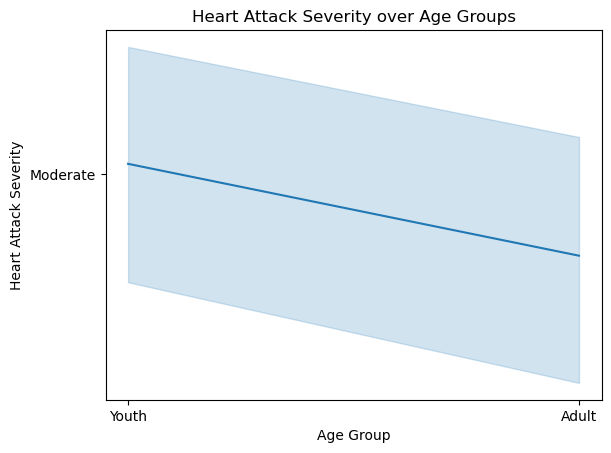

In [41]:
sns.lineplot(data=df, x='Age_Group', y='Heart_Attack_Severity')
plt.title('Heart Attack Severity over Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Heart Attack Severity')
plt.show()

# DATA CLEANING AND PREPROCESSING


Check for duplicate rows

In [4]:
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 598796


In [5]:
df = df.drop_duplicates()


Dropping unwanted columns

In [6]:
df = df.drop(['State','Income_Level','Urban_Rural','Employment_Status'], axis=1, errors='ignore')

 dropping the null values

In [7]:
df = df.dropna()
df.isnull().sum()

Age_Group                0
Gender                   0
BMI                      0
Smoking_Status           0
Alcohol_Consumption      0
Exercise_Frequency       0
Hypertension             0
Diabetes                 0
Cholesterol_Level        0
Family_History           0
Stress_Level             0
Diet_Type                0
Heart_Attack_Severity    0
Hospitalized             0
Survived                 0
dtype: int64

In [8]:
df.shape

(224703, 15)

In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,224703.0,27.492453,7.223598,15.0,21.2,27.5,33.7,40.0


In [49]:
df.describe(include = 'object').transpose()

,count,unique,top,freq
Age_Group,224703,2,Youth,112408
Gender,224703,2,Female,112372
Smoking_Status,224703,2,Smoker,112405
Alcohol_Consumption,224703,3,Moderate,75167
Exercise_Frequency,224703,4,Daily,56480
Hypertension,224703,2,No,112627
Diabetes,224703,2,Yes,112561
Cholesterol_Level,224703,3,Normal,75087
Family_History,224703,2,Yes,112656
Stress_Level,224703,3,Low,75083


In [50]:
print("Column: Age_Group")
print(df['Age_Group'].value_counts())

print("Column: Gender")
print(df['Gender'].value_counts())

print("Column: Smoking_Status")
print(df['Smoking_Status'].value_counts())

print("Column: Alcohol_Consumption")
print(df['Alcohol_Consumption'].value_counts())

print("Column: Exercise_Frequency")
print(df['Exercise_Frequency'].value_counts())

print("Column: Hypertension")
print(df['Hypertension'].value_counts())

print("Column: Diabetes")
print(df['Diabetes'].value_counts())

print("Column: Cholesterol_Level")
print(df['Cholesterol_Level'].value_counts())

print("Column: Family_History")
print(df['Family_History'].value_counts())

print("Column: Stress_Level")
print(df['Stress_Level'].value_counts())

print("Column: Diet_Type")
print(df['Diet_Type'].value_counts())

print("Column: Heart_Attack_Severity")
print(df['Heart_Attack_Severity'].value_counts())

print("Column: Hospitalized")
print(df['Hospitalized'].value_counts())

print("Column: Survived")
print(df['Survived'].value_counts())


Column: Age_Group
Age_Group
Youth    112408
Adult    112295
Name: count, dtype: int64
Column: Gender
Gender
Female    112372
Male      112331
Name: count, dtype: int64
Column: Smoking_Status
Smoking_Status
Smoker        112405
Non-Smoker    112298
Name: count, dtype: int64
Column: Alcohol_Consumption
Alcohol_Consumption
Moderate    75167
Low         75049
High        74487
Name: count, dtype: int64
Column: Exercise_Frequency
Exercise_Frequency
Daily           56480
Occasionally    56187
Weekly          56170
Rarely          55866
Name: count, dtype: int64
Column: Hypertension
Hypertension
No     112627
Yes    112076
Name: count, dtype: int64
Column: Diabetes
Diabetes
Yes    112561
No     112142
Name: count, dtype: int64
Column: Cholesterol_Level
Cholesterol_Level
Normal        75087
High          74960
Borderline    74656
Name: count, dtype: int64
Column: Family_History
Family_History
Yes    112656
No     112047
Name: count, dtype: int64
Column: Stress_Level
Stress_Level
Low         75

CHECKING FOR OUTLIERS

In [9]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [10]:
bmi_outliers = find_outliers_iqr(df, "BMI")
bmi_outliers

,Age_Group,Gender,BMI,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Hypertension,Diabetes,Cholesterol_Level,Family_History,Stress_Level,Diet_Type,Heart_Attack_Severity,Hospitalized,Survived


# ENCODING


In [11]:
df.columns.to_list()

['Age_Group',
 'Gender',
 'BMI',
 'Smoking_Status',
 'Alcohol_Consumption',
 'Exercise_Frequency',
 'Hypertension',
 'Diabetes',
 'Cholesterol_Level',
 'Family_History',
 'Stress_Level',
 'Diet_Type',
 'Heart_Attack_Severity',
 'Hospitalized',
 'Survived']

COUNTING THE VALUES IN CATEGORICAL COLUMNS

In [12]:

categorical_cols = ['Age_Group', 'Gender', 'Smoking_Status', 'Alcohol_Consumption', 'Exercise_Frequency', 
                    'Hypertension', 'Diabetes', 'Cholesterol_Level', 'Family_History', 'Stress_Level', 
                    'Diet_Type', 'Heart_Attack_Severity', 'Hospitalized', 'Survived']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le
df.head(10)


,Age_Group,Gender,BMI,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Hypertension,Diabetes,Cholesterol_Level,Family_History,Stress_Level,Diet_Type,Heart_Attack_Severity,Hospitalized,Survived
0,1,0,34.5,0,0,1,0,1,0,1,1,2,0,0,1
1,1,1,15.2,0,0,1,0,1,1,0,2,2,0,1,0
2,1,0,25.0,0,0,3,0,1,1,0,2,1,1,1,0
3,1,1,19.7,0,0,1,0,0,1,1,0,0,0,1,0
4,0,0,35.6,0,1,2,0,1,1,1,0,0,1,0,1
6,1,0,23.2,1,2,0,1,0,2,1,1,0,2,1,0
8,1,1,20.4,1,2,3,0,0,2,1,1,0,1,1,1
9,0,1,30.2,1,2,3,0,0,2,0,1,2,2,0,1
10,1,1,22.1,1,2,2,0,0,0,1,1,2,0,1,0
11,1,1,32.1,1,1,0,1,0,0,0,1,0,1,1,0


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age_Group,224703.0,0.500251,0.500001,0.0,0.0,1.0,1.0,1.0
Gender,224703.0,0.499909,0.500001,0.0,0.0,0.0,1.0,1.0
BMI,224703.0,27.492453,7.223598,15.0,21.2,27.5,33.7,40.0
Smoking_Status,224703.0,0.500238,0.500001,0.0,0.0,1.0,1.0,1.0
Alcohol_Consumption,224703.0,1.003026,0.816089,0.0,0.0,1.0,2.0,2.0
Exercise_Frequency,224703.0,1.497216,1.119221,0.0,0.0,1.0,2.0,3.0
Hypertension,224703.0,0.498774,0.500000,0.0,0.0,0.0,1.0,1.0
Diabetes,224703.0,0.500932,0.500000,0.0,0.0,1.0,1.0,1.0
Cholesterol_Level,224703.0,1.001918,0.816335,0.0,0.0,1.0,2.0,2.0
Family_History,224703.0,0.501355,0.499999,0.0,0.0,1.0,1.0,1.0


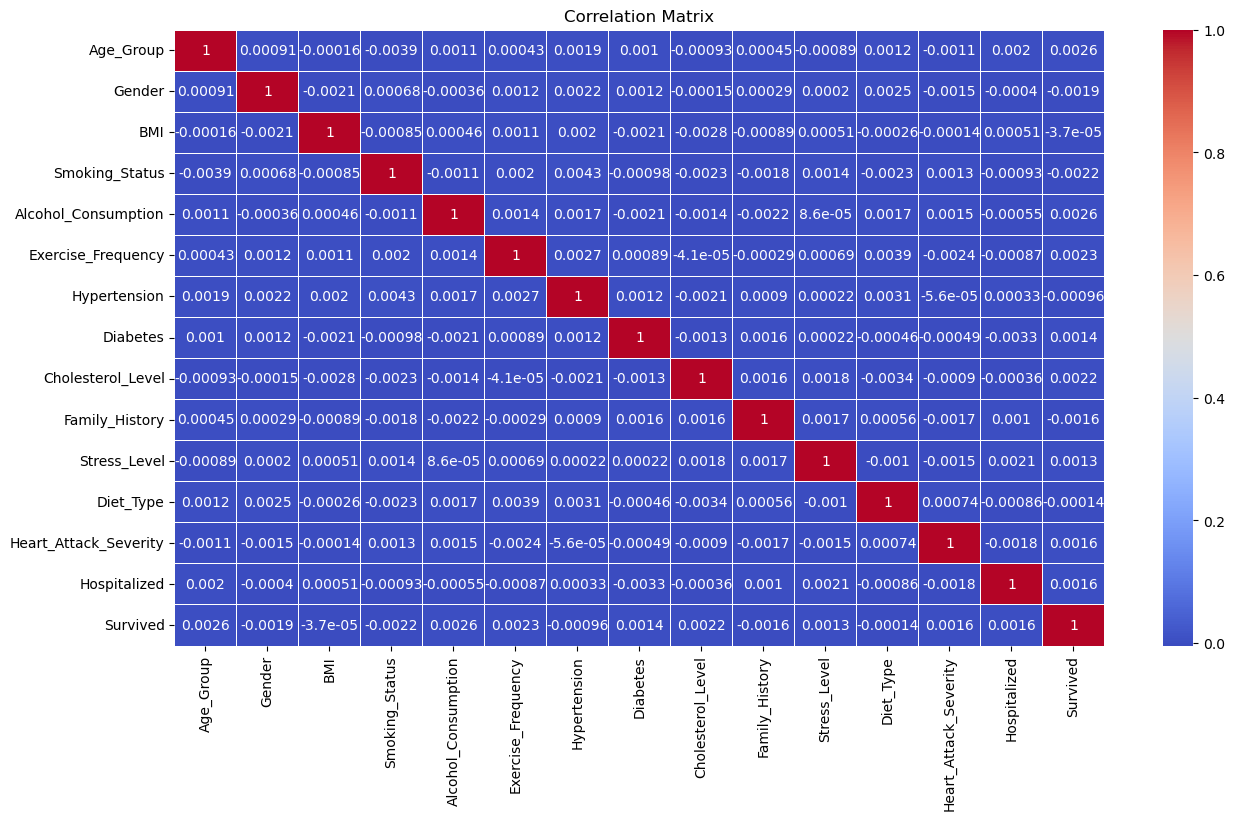

In [22]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224703 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age_Group              224703 non-null  int32  
 1   Gender                 224703 non-null  int32  
 2   BMI                    224703 non-null  float64
 3   Smoking_Status         224703 non-null  int32  
 4   Alcohol_Consumption    224703 non-null  int32  
 5   Exercise_Frequency     224703 non-null  int32  
 6   Hypertension           224703 non-null  int32  
 7   Diabetes               224703 non-null  int32  
 8   Cholesterol_Level      224703 non-null  int32  
 9   Family_History         224703 non-null  int32  
 10  Stress_Level           224703 non-null  int32  
 11  Diet_Type              224703 non-null  int32  
 12  Heart_Attack_Severity  224703 non-null  int32  
 13  Hospitalized           224703 non-null  int32  
 14  Survived               224703 non-null  i

# PREDECTIVE MODELLING

Prepare data for predictive modeling


In [14]:
X = df.drop(columns=['Survived'])
y = df['Survived']

Split the data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_test.shape

(67411, 14)

In [25]:
X_train.shape

(157292, 14)

Scaling 

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [27]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([0, 1, 0, ..., 1, 0, 0])

In [29]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of logistic regression model: {accuracy_lr * 100:.2f}%")
print(classification_report(y_test, y_pred_lr))
confusion_matrix(y_test, y_pred_lr)

Accuracy of logistic regression model: 49.93%
              precision    recall  f1-score   support

           0       0.50      0.64      0.56     33735
           1       0.50      0.36      0.42     33676

    accuracy                           0.50     67411
   macro avg       0.50      0.50      0.49     67411
weighted avg       0.50      0.50      0.49     67411



array([[21508, 12227],
       [21525, 12151]], dtype=int64)

Random Forest Classifier

In [30]:
rf=RandomForestClassifier()

In [31]:
n_estimators = [100,200]
max_features = [2, 3]
max_depth=[5,10,None]
param_grids = {'n_estimators':n_estimators,'max_features':max_features,"max_depth":max_depth}
grid=GridSearchCV(rf,param_grids,verbose=2,cv=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ......max_depth=5, max_features=2, n_estimators=100; total time=   2.3s
[CV] END ......max_depth=5, max_features=2, n_estimators=100; total time=   2.1s
[CV] END ......max_depth=5, max_features=2, n_estimators=100; total time=   2.1s
[CV] END ......max_depth=5, max_features=2, n_estimators=200; total time=   4.4s
[CV] END ......max_depth=5, max_features=2, n_estimators=200; total time=   4.4s
[CV] END ......max_depth=5, max_features=2, n_estimators=200; total time=   4.2s
[CV] END ......max_depth=5, max_features=3, n_estimators=100; total time=   2.6s
[CV] END ......max_depth=5, max_features=3, n_estimators=100; total time=   2.6s
[CV] END ......max_depth=5, max_features=3, n_estimators=100; total time=   2.6s
[CV] END ......max_depth=5, max_features=3, n_estimators=200; total time=   4.9s
[CV] END ......max_depth=5, max_features=3, n_estimators=200; total time=   4.8s
[CV] END ......max_depth=5, max_features=3, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, None], 'max_features': [2, 3],
                         'n_estimators': [100, 200]},
             verbose=2)

In [32]:
best_forest_parameter=grid.best_estimator_
best_forest_parameter

RandomForestClassifier(max_features=3)

In [33]:
y_pred_forest=best_forest_parameter.predict(X_test)
y_pred_forest

array([1, 1, 0, ..., 1, 1, 0])

In [34]:
forest_accuracy = accuracy_score(y_test, y_pred_forest)
print(f"Accuaracy of Random Forest model:{forest_accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_forest))
confusion_matrix(y_test, y_pred_forest)

Accuaracy of Random Forest model:50.03%
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     33735
           1       0.50      0.48      0.49     33676

    accuracy                           0.50     67411
   macro avg       0.50      0.50      0.50     67411
weighted avg       0.50      0.50      0.50     67411



array([[17534, 16201],
       [17482, 16194]], dtype=int64)

Decision Tree Classifier

In [35]:
dtc=DecisionTreeClassifier(random_state=42)
criterion=["gini","entropy"]
min_samples_split=[2,7,11]
max_depth=[3,7,None]
params_grid={"criterion":criterion,"min_samples_split":min_samples_split,"max_depth":max_depth}
grid=GridSearchCV(dtc,params_grid,verbose=2,cv=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=7; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_split=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_split=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_split=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_split=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=7, min_sam

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, None],
                         'min_samples_split': [2, 7, 11]},
             verbose=2)

In [36]:
best_dtc_paarmeter = grid.best_estimator_
best_dtc_paarmeter

DecisionTreeClassifier(min_samples_split=11, random_state=42)

In [37]:
y_predict_dtc = best_dtc_paarmeter.predict(X_test)
y_predict_dtc

array([1, 0, 1, ..., 1, 0, 1])

In [38]:
dtc_accuracy  = accuracy_score(y_test,y_predict_dtc)
print(f"Accuracy of Decision Tree Classifier model:{dtc_accuracy * 100:.2f}%")
print(classification_report(y_test, y_predict_dtc))
confusion_matrix(y_test, y_predict_dtc)


Accuracy of Decision Tree Classifier model:49.87%
              precision    recall  f1-score   support

           0       0.50      0.53      0.52     33735
           1       0.50      0.46      0.48     33676

    accuracy                           0.50     67411
   macro avg       0.50      0.50      0.50     67411
weighted avg       0.50      0.50      0.50     67411



array([[18024, 15711],
       [18080, 15596]], dtype=int64)

K-Nearest Neighbor

In [39]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [40]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 1, 0, ..., 1, 0, 0])

In [41]:
knn_accuracy  = accuracy_score(y_test, y_pred_knn)
print(f"accuracy of knn model:{knn_accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_knn))
confusion_matrix(y_test, y_pred_knn)

accuracy of knn model:50.27%
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     33735
           1       0.50      0.50      0.50     33676

    accuracy                           0.50     67411
   macro avg       0.50      0.50      0.50     67411
weighted avg       0.50      0.50      0.50     67411



array([[17160, 16575],
       [16949, 16727]], dtype=int64)

# Compairing the models

In [42]:
print("accuracy score of each models")
print(f"Accuracy of logistic regression model: {accuracy_lr * 100:.2f}%")
print(f"Accuaracy of Random Forest model:{forest_accuracy * 100:.2f}%")
print(f"Accuracy of Decision Tree Classifier model:{dtc_accuracy * 100:.2f}%")
print(f"accuracy of knn model:{knn_accuracy * 100:.2f}%")

accuracy score of each models
Accuracy of logistic regression model: 49.93%
Accuaracy of Random Forest model:50.03%
Accuracy of Decision Tree Classifier model:49.87%
accuracy of knn model:50.27%


BEST MODELS IS K NEAREST NEIGHBOUR WITH ACCURACY SCORE 50.27%